In [2]:
# Importing MSFT data from yahoo finance

In [17]:
import yfinance as yf
# Get the data for tatamotors
ticker = "MSFT"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [18]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

C:\Users\Chand\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002986. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1985.22
Distribution:                  Normal   AIC:                          -3964.45
Method:            Maximum Likelihood   BIC:                          -3950.59
                                        No. Observations:                  750
Date:                Wed, Jul 24 2024   Df Residuals:                      749
Time:                        17:41:33   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.1610e-03  6.978e-04      1.664  9.614e-02 

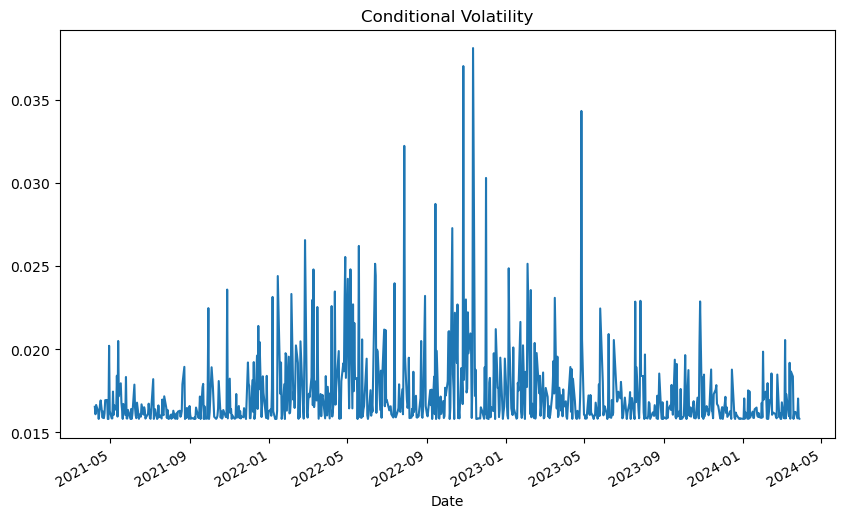

In [25]:
import pandas as pd
from arch import arch_model

# DataFrame is named 'data'

# Calculate daily returns using 'Close' prices
data['Returns'] = data['Close'].pct_change().dropna()

# Drop the first row since it will have NaN value for returns
data = data.dropna(subset=['Returns'])

# Fit an ARCH model
arch_model_fit = arch_model(data['Returns'], vol='ARCH', p=1).fit(disp='off')
print(arch_model_fit.summary())

# Plot the conditional volatility
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
arch_model_fit.conditional_volatility.plot()
plt.title('Conditional Volatility')
plt.show()

In [21]:
# Print the column names of the DataFrame
print(data.columns)

# If 'Returns' is not in the columns, check the available column names
print(data.head())


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  238.470001  242.839996  238.050003  242.350006  235.693466   
2021-04-05  242.759995  249.960007  242.699997  249.070007  242.228912   
2021-04-06  247.610001  249.399994  246.880005  247.860001  241.052124   
2021-04-07  247.809998  250.929993  247.190002  249.899994  243.036087   
2021-04-08  252.770004  254.139999  252.000000  253.250000  246.294067   

              Volume  
Date                  
2021-04-01  30338000  
2021-04-05  36910600  
2021-04-06  22931900  
2021-04-07  22719800  
2021-04-08  23625200  


In [19]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility

C:\Users\Chand\AppData\Local\Temp\ipykernel_11068\2224146025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Returns'] = data['Close'].pct_change().dropna()
C:\Users\Chand\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002982. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2023.55
Distribution:                  Normal   AIC:                          -4039.11
Method:            Maximum Likelihood   BIC:                          -4020.62
                                        No. Observations:                  751
Date:                Wed, Jul 24 2024   Df Residuals:                      750
Time:                        17:41:18   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.3270e-03  3.105e-04      4.274  1.924e-05 [7.

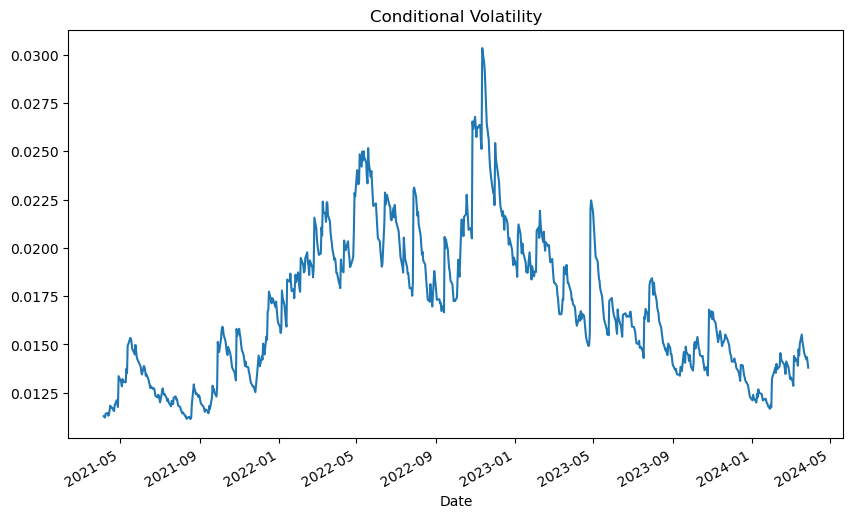

In [24]:
# Calculate daily returns using 'Close' prices
data['Returns'] = data['Close'].pct_change().dropna()

# Drop the first row since it will have NaN value for returns
data = data.dropna(subset=['Returns'])

# Fit a GARCH model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)
garch_model_fit = garch_model.fit(disp='off')
print(garch_model_fit.summary())

# Plot the conditional volatility
plt.figure(figsize=(10, 6))
garch_model_fit.conditional_volatility.plot()
plt.title('Conditional Volatility')
plt.show()

In [26]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Iteration:      5,   Func. Count:     32,   Neg. LLF: 1688.6608487991796
Iteration:     10,   Func. Count:     64,   Neg. LLF: 1434.3663530409563
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1434.3663055081292
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


In [27]:
forecasts = res.forecast()

In [28]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [29]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-03-22,429.700012,429.859985,426.070007,428.739990,427.968048,17636500,-0.001467
2024-03-25,425.239990,427.410004,421.609985,422.859985,422.098633,18060500,-0.013715
2024-03-26,425.609985,425.989990,421.350006,421.649994,420.890808,16725600,-0.002861
2024-03-27,424.440002,424.450012,419.010010,421.429993,420.671204,16705000,-0.000522
2024-03-28,420.959991,421.869995,419.119995,420.720001,419.962494,21871200,-0.001685


In [30]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-03-28  0.139821
                 h.1
Date                
2024-03-28  1.637955
                 h.1
Date                
2024-03-28  1.637955


In [31]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-03-28  1.637955  1.643979  1.649981  1.655962  1.661922  1.667859   

                h.07      h.08      h.09      h.10  ...      h.81      h.82  \
Date                                                ...                       
2024-03-28  1.673776  1.679671  1.685545  1.691398  ...  2.057432  2.061949   

                h.83      h.84    h.85      h.86      h.87      h.88  \
Date                                                                   
2024-03-28  2.066449  2.070933  2.0754  2.079852  2.084288  2.088708   

                h.89      h.90  
Date                            
2024-03-28  2.093111  2.097499  

[1 rows x 90 columns]


In [32]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-28,1.637955,1.643979,1.649981,1.655962,1.661922,1.667859,1.673776,1.679671,1.685545,1.691398,...,2.057432,2.061949,2.066449,2.070933,2.0754,2.079852,2.084288,2.088708,2.093111,2.097499


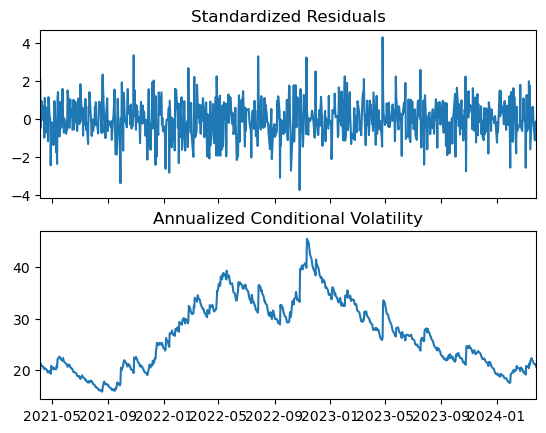

In [33]:
fig = res.plot(annualize="D")